In [1]:
#pip install  matplotlib==3.2.2
#sudo apt-get install ttf-wqy-zenhei -y

In [2]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import backtrader as bt

if __name__ == '__main__':
    cerebro = bt.Cerebro()

    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    cerebro.run()

    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 10000.00
Final Portfolio Value: 10000.00


In [15]:
import akshare as ak
wanmei = ak.stock_zh_a_daily(symbol="sz002624", start_date="20210101",
                             end_date="20220330", adjust="qfq")
wanmei=wanmei.set_index('date')
wanmei

,open,high,low,close,volume,outstanding_share,turnover
date,,,,,,,
2021-01-04,29.28,30.35,28.91,29.89,43601981.0,1.789981e+09,0.024359
2021-01-05,29.59,31.32,29.49,30.62,43608514.0,1.789981e+09,0.024363
2021-01-06,30.63,31.01,29.57,29.98,33244642.0,1.789981e+09,0.018573
2021-01-07,29.51,29.73,28.20,28.81,43046178.0,1.789981e+09,0.024048
2021-01-08,28.50,31.03,28.36,30.21,69925572.0,1.789981e+09,0.039065
...,...,...,...,...,...,...,...
2022-03-24,13.31,13.37,12.94,12.99,40061843.0,1.827237e+09,0.021925
2022-03-25,13.03,13.20,12.78,12.80,35072959.0,1.827237e+09,0.019195
2022-03-28,12.75,13.10,12.71,12.98,33790788.0,1.827237e+09,0.018493


In [4]:
import backtrader as bt

class TestStrategy(bt.Strategy):
    def next(self):
        today=self.datas[0].datetime.date()
        weekday=today.weekday()+1
        close=self.datas[0].close[0]
        print("今天是："+str(today)+"，星期"+str(weekday)
              +"，收盘价是："+str(close))

cerebro = bt.Cerebro()
cerebro.addstrategy(TestStrategy)
#
data = bt.feeds.PandasData(dataname=wanmei)
cerebro.adddata(data)

cerebro.broker.setcash(100000.0)
cerebro.run()

今天是：2021-01-04，星期1，收盘价是：29.89
今天是：2021-01-05，星期2，收盘价是：30.62
今天是：2021-01-06，星期3，收盘价是：29.98
今天是：2021-01-07，星期4，收盘价是：28.81
今天是：2021-01-08，星期5，收盘价是：30.21
今天是：2021-01-11，星期1，收盘价是：29.48
今天是：2021-01-12，星期2，收盘价是：27.58
今天是：2021-01-13，星期3，收盘价是：26.99
今天是：2021-01-14，星期4，收盘价是：25.88
今天是：2021-01-15，星期5，收盘价是：25.71
今天是：2021-01-18，星期1，收盘价是：26.59
今天是：2021-01-19，星期2，收盘价是：26.14
今天是：2021-01-20，星期3，收盘价是：26.39
今天是：2021-01-21，星期4，收盘价是：27.61
今天是：2021-01-22，星期5，收盘价是：27.2
今天是：2021-01-25，星期1，收盘价是：25.97
今天是：2021-01-26，星期2，收盘价是：25.99
今天是：2021-01-27，星期3，收盘价是：27.8
今天是：2021-01-28，星期4，收盘价是：27.53
今天是：2021-01-29，星期5，收盘价是：27.09
今天是：2021-02-01，星期1，收盘价是：27.53
今天是：2021-02-02，星期2，收盘价是：26.52
今天是：2021-02-03，星期3，收盘价是：26.26
今天是：2021-02-04，星期4，收盘价是：23.69
今天是：2021-02-05，星期5，收盘价是：23.18
今天是：2021-02-08，星期1，收盘价是：22.8
今天是：2021-02-09，星期2，收盘价是：23.21
今天是：2021-02-10，星期3，收盘价是：23.52
今天是：2021-02-18，星期4，收盘价是：23.97
今天是：2021-02-19，星期5，收盘价是：25.25
今天是：2021-02-22，星期1，收盘价是：24.49
今天是：2021-02-23，星期2，收盘价是：23.9
今天是：2021-02-24，星期3，收盘价是：24.06
今天是：2021-02-25

buy3300
100000.0
2353.0
2353.0
sell3300
2353.0
96403.0
buy3200
96403.0
3635.0
3635.0
sell3200
3635.0
86707.0
buy3200
86707.0
1555.0
1555.0
sell3200
1555.0
90195.0
buy3400
90195.0
2747.0
2747.0
sell3400
2747.0
96927.0
buy3500
96927.0
502.0
502.0
sell3500
502.0
83592.0
buy3600
83592.0
1368.0
1368.0
sell3600
1368.0
87624.0
buy3500
87624.0
2819.0
2819.0
sell3500
2819.0
84474.0
buy3400
84474.0
2092.0
2092.0
sell3400
2092.0
85426.0
buy3400
85426.0
2058.0
2058.0
sell3400
2058.0
79034.0
buy3900
79034.0
3608.0
3608.0
sell3900
3608.0
79502.0
buy4100
79502.0
741.0
741.0
sell4100
741.0
80404.0
buy4200
80404.0
58.0
58.0
sell4200
58.0
83764.0
83764.0
83764.0
sell0
83764.0
83764.0
buy4200
83764.0
898.0
898.0
sell4200
898.0
89938.0
buy4100
89938.0
1829.0
1829.0
sell4100
1829.0
92398.0
buy4300
92398.0
1410.0
1410.0
sell4300
1410.0
93774.0
sell0
93774.0
93774.0
buy4600
93774.0
1866.0
1866.0
sell4600
1866.0
97546.0
buy4500
97546.0
1696.0
1696.0
sell4500
1696.0
102676.0
buy4600
102676.0
1798.0
1798.0
sell

<IPython.core.display.Javascript object>


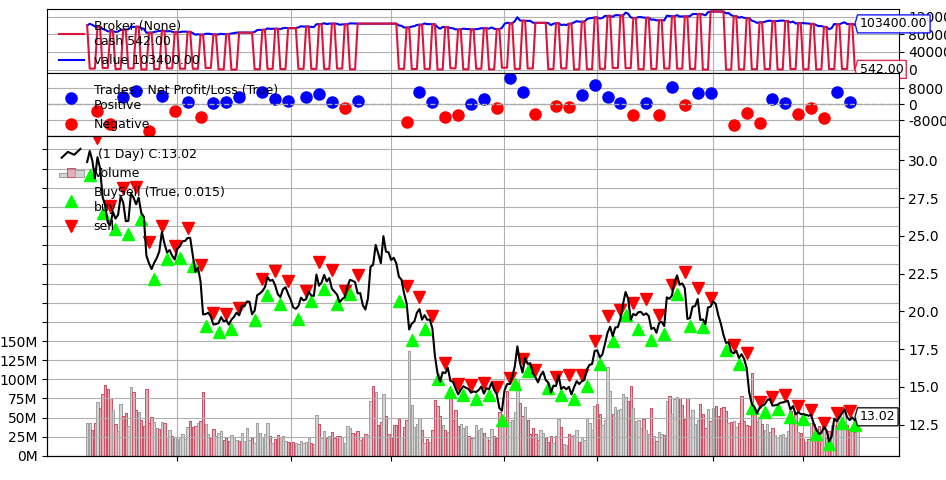

[[<Figure size 640x480 with 4 Axes>]]

In [103]:
import backtrader as bt
import math
class TestStrategy(bt.Strategy):
    def next(self):
        today=self.datas[0].datetime.date()
        weekday=today.weekday()+1
        close=self.datas[0].close[0]
        if weekday==1:
            self.order=self.buy(size= int(self.broker.get_cash()/close/100)*100 )
            print("buy"+str(int(self.broker.get_cash()/close/100)*100  ))
        elif weekday==4:
            self.order=self.sell(size=self.getposition().size)
            print("sell"+str(self.getposition().size) )
            
        print(cerebro.broker.get_cash())

        

cerebro = bt.Cerebro()
cerebro.addstrategy(TestStrategy)
#
data = bt.feeds.PandasData(dataname=wanmei)
cerebro.adddata(data)

cerebro.broker.setcash(100000.0)
cerebro.run()
cerebro.plot()

In [104]:
import backtrader as bt
import pandas as pd
import math
class TestStrategy(bt.Strategy):
    def next(self):
        today=self.datas[0].datetime.date()
        weekday=today.weekday()+1
        close=self.datas[0].close[0]
        if weekday==1:
            self.order=self.buy(size= int(self.broker.get_cash()/close/100)*100 )
            #print("buy"+str(int(self.broker.get_cash()/close/100)*100  ))
        elif weekday==4:
            self.order=self.sell(size=self.getposition().size)
            #print("sell"+str(self.getposition().size) )
            
        #print(cerebro.broker.get_cash())
cerebro = bt.Cerebro()
cerebro.addstrategy(TestStrategy)

wanmei_btdata = bt.feeds.PandasData(dataname=wanmei)
cerebro.adddata(wanmei_btdata)

cerebro.broker.setcash(100000.0)
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name = "TimeReturn")
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name = "TimeReturnBenchMark", data = wanmei_btdata)
results = cerebro.run()
strat = results[0] 
portvalue = cerebro.broker.getvalue()
returns=pd.Series(strat.analyzers.TimeReturn.get_analysis())
benchReturns=pd.Series(strat.analyzers.TimeReturnBenchMark.get_analysis())

print(returns)

2021-01-04    0.000000
2021-01-05    0.033990
2021-01-06   -0.020426
2021-01-07   -0.038119
2021-01-08   -0.010500
                ...   
2022-03-24   -0.037912
2022-03-25    0.003031
2022-03-28    0.000000
2022-03-29   -0.016834
2022-03-30    0.018679
Length: 300, dtype: float64


In [105]:
my_pct=[]
bench_pct=[]

my_pct=returns+1
my_pct=my_pct.cumprod()
bench_pct=benchReturns+1
bench_pct=bench_pct.cumprod()

<IPython.core.display.Javascript object>


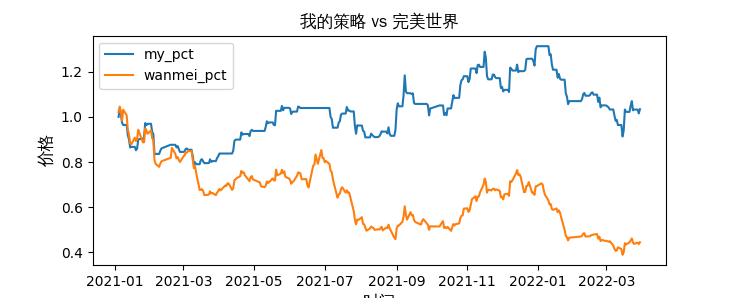

In [106]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname=r"/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc", size=12) 

plt.figure(dpi=100,figsize=(8,3))
plt.title(u"我的策略 vs 完美世界",fontproperties=font_set)
plt.xlabel(u"时间",fontproperties=font_set)
plt.ylabel(u"价格",fontproperties=font_set)
plt.plot(my_pct)
plt.plot(bench_pct)
plt.legend([u'my_pct','wanmei_pct'])

 
plt.show()

In [14]:
import matplotlib
matplotlib.matplotlib_fname() 

'/home/ubuntu/myquant/matplotlibrc'